# Wheel rolling down on an slope

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from scipy.integrate import odeint
from scipy.constants import g
from IPython.display import HTML

In [2]:
# Define wheel ODE
# State x = [r, v]
def func(x, t):
    dxdt = np.zeros_like(x)
    dxdt[0] = x[1]         # position is integral of velocity
    dxdt[1] = 2 * g / 3 * np.sin(phi)
    return dxdt

In [3]:
# Conditions
a = 0.25                  # radius 25 cm
phi = np.radians(2)       # incine 1 degrees

In [4]:
# Solve
dt = 0.001
t = np.arange(0.0, 8.0, dt)
x0 = np.array([0, 0])

sol = odeint(func, x0, t)

In [5]:
# Postprocessing
r = sol[:, 0]
X = r * np.cos(phi)
Y = -r * np.sin(phi)
v = sol[:, 1]
theta = (r / a) % (2 * np.pi)

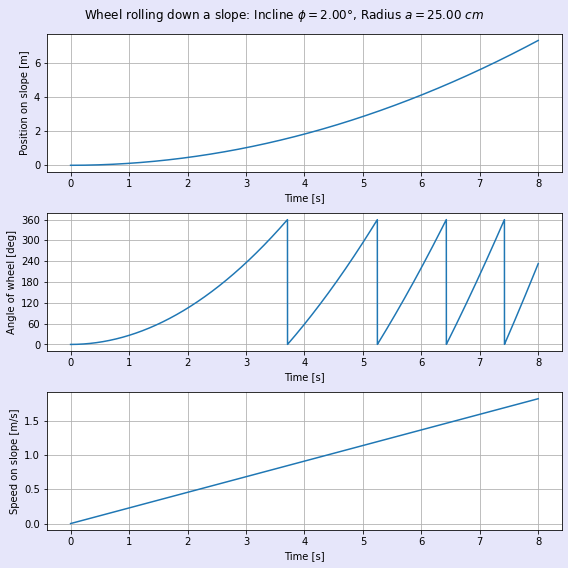

In [6]:
# Time-domain plots
fig, ax = plt.subplots(3, 1, figsize = (8, 8))
fig.patch.set_facecolor('lavender')
fig.suptitle(f'Wheel rolling down a slope: Incline $\phi = {np.degrees(phi):.2f}\degree$, Radius $a = {a * 100:.2f}~cm$')

# Plot position, parallel to slope
ax[0].plot(t, r)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Position on slope [m]')
ax[0].grid()

# Plot angle
ax[1].plot(t, np.degrees(theta))
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Angle of wheel [deg]')
ax[1].set_yticks(range(0, 420, 60))
ax[1].grid()

# Plot speed, parallel to slope
ax[2].plot(t, v)
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Speed on slope [m/s]')
ax[2].grid()

fig.tight_layout()

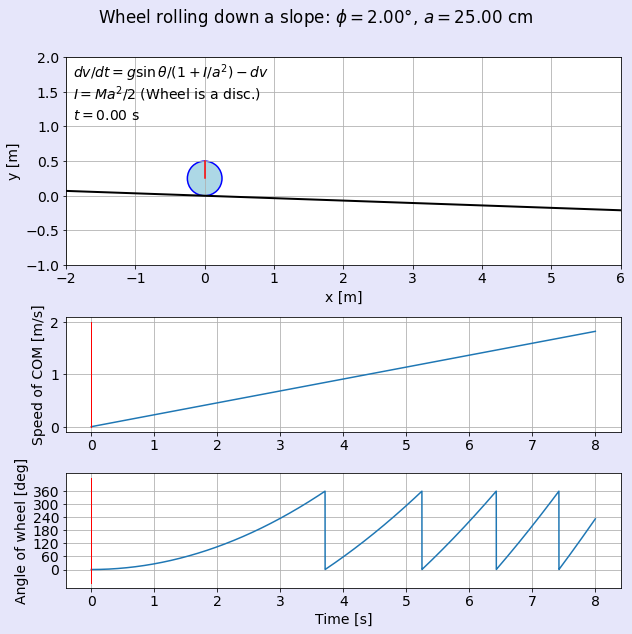

In [7]:
# Animate
plt.rcParams["font.size"] = 14
fig, ax = plt.subplots(3, 1, figsize = (9, 9), gridspec_kw={'height_ratios': [2, 1, 1]})
fig.patch.set_facecolor('lavender')
ax[0].set_aspect('equal')
fig.suptitle(f'Wheel rolling down a slope: $\phi = {np.degrees(phi):.2f}\degree$, $a = {a * 100:.2f}$ cm')

# Set axes
ax[0].set_xlim(-2, 6)
ax[0].set_xlabel('x [m]')
ax[0].set_ylim(-1, 2)
ax[0].set_ylabel('y [m]')
ax[0].grid()

# Draw slope
ax[0].plot(np.arange(-2, 7) * np.cos(phi), np.arange(-2, 7) * np.sin(-phi), lw = 2, color = 'black')

# Draw motion equation
ax[0].text(-1.9, 1.7, r'$dv/dt = g \sin \theta / (1 + I / a^2) - d v$')
ax[0].text(-1.9, 1.4, r'$I = M a^2 / 2$ (Wheel is a disc.)')
text_time = ax[0].text(-1.9, 1.1, f'$t = {t[0]:.2f}$ s')

# Draw wheel
wheel = patches.Circle(xy = (X[0], Y[0] + a), radius = a, lw = 1.5, ec = 'blue', fc = 'lightblue')
ax[0].add_patch(wheel)

# Draw wheel angle marker
line, = ax[0].plot([X[0], X[0] - np.sin(theta[0])], [Y[0] + a, Y[0] + a + a * np.cos(theta[0])], lw = 1.5, c = 'red')

# Plot position, parallel to slope
ax[1].plot(t, v)
ax[1].set_ylabel('Speed of COM [m/s]')
line_time_1, = ax[1].plot([t[0], t[0]], [0, 2], lw = 1, c = 'red') 
ax[1].grid()

# Plot angle
ax[2].plot(t, np.degrees(theta))
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Angle of wheel [deg]')
ax[2].set_yticks(range(0, 420, 60))
line_time_2, = ax[2].plot([t[0], t[0]], [-60, 420], lw = 1, c = 'red') 
ax[2].grid()

fig.tight_layout()

In [8]:
# Function to update
def animate(i):
    # Update wheel position
    wheel.center = (X[i], Y[i] + a)
    
    # Update wheel angle marker
    line.set_data([X[i], X[i] + a * np.sin(theta[i])], [Y[i] + a, Y[i] + a + a * np.cos(theta[i])])
    
    # Update time text
    text_time.set_text(f'$t = {t[i]:.2f}$ s')
    
    # Update time bars
    line_time_1.set_data([t[i], t[i]], [0, 2])
    line_time_2.set_data([t[i], t[i]], [-60, 420])
    
    return (wheel, line, line_time_1, line_time_2)

In [ ]:
# Create animation
ani = animation.FuncAnimation(fig, animate, \
    frames = np.arange(0, len(t), 20), interval = (t[1] - t[0]) * 20 * 1000, blit = True)

# Show animation
HTML(ani.to_html5_video())